# Audio File Matching

This notebook continues the audio file matching problem. Be sure to have song.wav and clip.wav in the same directory as the notebook.

In this notebook, we will look at the problem of searching for a small audio clip inside a song.

The song "Mandelbrot Set" by Jonathan Coulton is licensed under <a href="http://creativecommons.org/licenses/by-nc/3.0/">CC BY-NC 3.0</a>

If you have trouble playing the audio file in IPython, try opening it in a different browser. I encountered problem with Safari but Chrome works for me.

In [ ]:
import numpy as np
import wave
import matplotlib.pyplot as plt
import scipy.io.wavfile
import operator
from IPython.display import Audio
%matplotlib inline

given_file = 'song.wav'
target_file = 'clip.wav'
rate_given,  given_signal  = scipy.io.wavfile.read(given_file)
rate_target, target_signal = scipy.io.wavfile.read(target_file)
given_signal  = given_signal[:2000000].astype(float)
target_signal = target_signal.astype(float)
def play_clip(start, end, signal=given_signal):
    scipy.io.wavfile.write('temp.wav', rate_given, signal[start:end].astype(np.int16))
    return Audio(url='temp.wav', autoplay=True)

def run_comparison(target_signal, given_signal, idxs=None):
    # Run everything if not called with idxs set to something
    if idxs is None:
        idxs = [i for i in range(len(given_signal)-len(target_signal))]
    return idxs, [vector_compare(target_signal, given_signal[i:i+len(target_signal)])
                for i in idxs]

play_clip(0, len(given_signal))

#scipy.io.wavfile.write(target_file, rate_given, (-0.125*given_signal[1380000:1380000+70000]).astype(np.int16))

We will load the song into the variable `given_signal` and load the short clip into the variable `target_signal`. Your job is to finish code that will identify the short clip's location in the song. The clip we are trying to find will play after executing the following block.

In [ ]:
Audio(url=target_file, autoplay=True)

Your task is to define the function 'vector_compare' and run the following code. Because the song has a lot of data, you should use the provided examples from the previous parts of the problem before running the later code. Do you results here make sense given your answers to previous parts of the problem?

In [ ]:
def vector_compare(desired_vec, test_vec):
    """This function compares two vectors, returning a number.
    The test vector with the highest return value is regarded as being closest to the desired vector."""
    # The transpose is a gotcha! Stupid numpy
    # your code here

print("PART A:")
print(vector_compare(np.array([1,1,1]), np.array([1,1,1])))
print(vector_compare(np.array([1,1,1]), np.array([-1,-1,-1])))
print("PART C:")
print(vector_compare(np.array([1,2,3]), np.array([1,2,3])))
print(vector_compare(np.array([1,2,3]), np.array([2,3,4])))
print(vector_compare(np.array([1,2,3]), np.array([3,4,5])))
print(vector_compare(np.array([1,2,3]), np.array([4,5,6])))
print(vector_compare(np.array([1,2,3]), np.array([5,6,7])))
print(vector_compare(np.array([1,2,3]), np.array([6,7,8])))

Run the following code that runs `vector_compare` on every subsequence in the song- it will probably take at least 5 minutes. How do you interpret this plot to find where the clip is in the song?

In [ ]:
import time

t0 = time.time()
idxs, song_compare = run_comparison(target_signal, given_signal)
t1 = time.time()
plt.plot(idxs, song_compare)
print ("That took %(time).2f minutes to run" % {'time':(t1-t0)/60.0} )

# How Much Is Too Much?

In [ ]:
# Setup code
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

%matplotlib inline

   
"""Function that defines a data matrix for some input data."""
def data_matrix(input_data,degree): 
    # degree is the degree of the polynomial you plan to fit the data with    
    Data=np.zeros((len(input_data),degree+1))
    
    for k in range(0,degree+1):
        Data[:,k]=(list(map(lambda x:x**k ,input_data)))
                  
    return Data

"""Function that computes the Least Squares Approximation"""
def leastSquares(D,y): 
    return np.linalg.lstsq(D,y)[0]

"""This function is used for plotting only"""
def poly_curve(params,x_input):
    # params contains the coefficients that multiply the polynomial terms, in degree of lowest degree to highest degree
    degree=len(params)-1
    x_range=[x_input[1], x_input[-1]]
    x=np.linspace(x_range[0],x_range[1],1000)
    y=x*0
    
    for k in range(0,degree+1):
        coeff=params[k]
        y=y+list(map(lambda z:coeff*z**k,x))        
    return x,y
                  
np.random.seed(10)

## Part a) 
Some setup code to create our Resistor test Data points and plot them

In [ ]:
R = 0.5
x_a = np.linspace(-11,11,200)
y_a = (1/R)*x_a + (np.random.rand(len(x_a))-0.5)*10
fig = plt.figure()
ax=fig.add_subplot(111,xlim=[-11,11],ylim=[-21,21])
ax.plot(x_a,y_a, '.b', markersize=15)
ax.legend(['Data Points'])

Let's calculate a polynomial approximation of the above device. 

In [ ]:
#Play around with degree here to try and fit different degree polynomials
degree=15
D_a = data_matrix(x_a,degree)
p_a = leastSquares(D_a, y_a)

fig=plt.figure()
ax=fig.add_subplot(111,xlim=[-11,11],ylim=[-21,21])
x_a_,y_a_=poly_curve(p_a,x_a)
ax.plot(x_a,y_a,'.b',markersize=15)
ax.plot(x_a_, y_a_, 'r')
ax.legend(['Data points'])
plt.title('Polynomial of Degree %d' %(len(p_a)-1),fontsize=16)

## Part b)

In [ ]:
def cost(x, y, start, end):
    """Given a set of x and y points, this function 
    calculates polynomial approximations of varying 
    degrees from start to end and returns the cost 
    of each degree in an array"""
    c = []
    for degree in range(start, end):
        D = data_matrix(x,degree)
        params = leastSquares(D,y)
        error = np.linalg.norm(y-np.dot(D,params))
        c.append(error)
    return c

In [ ]:
start = 1
end = 15
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(range(start, end), cost(x_a,y_a,start,end))
plt.title('Cost vs Degree')

## Part c)

In [ ]:
# Extrapolation with Degree 1 Polynomial Fit
degree=1
x_a = np.linspace(-11,11,200)
y_a = (1/R)*x_a + (np.random.rand(len(x_a))-0.5)*10
D_a = data_matrix(x_a,degree)
p_a = leastSquares(D_a, y_a)

new_x_a = np.linspace(0,21,200)
new_x_a_,new_y_a_=poly_curve(p_a,new_x_a)
fig=plt.figure()
ax=fig.add_subplot(111,xlim=[0,20],ylim=[0,50])

ax.plot(x_a , y_a,'.b',markersize=15)
ax.plot(new_x_a_, new_y_a_, 'r')

In [ ]:
# Extrapolation with Degree 15 Polynomial Fit
degree=15
x_a = np.linspace(-11,11,200)
y_a = (1/R)*x_a + (np.random.rand(len(x_a))-0.5)*10
D_a = data_matrix(x_a,degree)
p_a = leastSquares(D_a, y_a)

new_x_a = np.linspace(0,21,200)
new_x_a_,new_y_a_=poly_curve(p_a,new_x_a)
fig=plt.figure()
ax=fig.add_subplot(111,xlim=[0,20],ylim=[0,50])

ax.plot(x_a , y_a,'.b',markersize=15)
ax.plot(new_x_a_, new_y_a_, 'r')

# Image Analysis

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as wdg  # Using the ipython notebook widgets
import matplotlib.image as mpimg
from matplotlib.widgets import Button

In [2]:
def plot_circle(a, d, e):
    """
    You can use this function to plot circles with parameters a,d,e.
    The parameters are described in the homework pdf. 
    
    """
    is_circle = d**2 + e**2 - 4*a > 0
    assert is_circle, "Not a circle"
    
    XLIM_LO = -1
    XLIM_HI = 3
    YLIM_LO = -2
    YLIM_HI = 2
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a*(x**2 + y**2) + d*x + e*y
    
    c1 = plt.contour(x, y, f(x,y), [1], colors='r')
    plt.axis('scaled')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Best Fit Circle")

In [3]:
def plot_ellipse(a, b, c, d, e):
    """
    You can use this function to plot ellipses with parameters a-e.
    The parameters are described in the homework pdf. 
    """
    is_ellipse = b**2 - 4*a*c < 0
    assert is_ellipse, "Not an ellipse"
    
    XLIM_LO = -1
    XLIM_HI = 3
    YLIM_LO = -2
    YLIM_HI = 2
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a*x**2 + b*x*y + c*y**2 + d*x + e*y
    
    c1 = plt.contour(x, y, f(x,y), [1], colors='r')
    plt.axis('scaled')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Best Fit Ellipse")

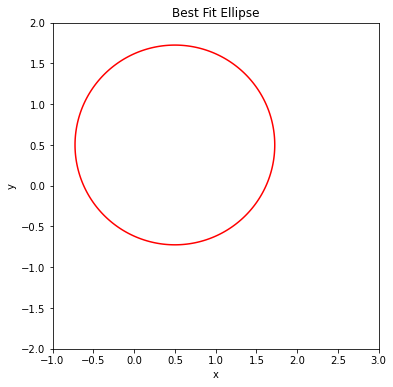

In [4]:
# Here is an example of plot_ellipse.
# This plots (x-1)**2 + (y-1)**2 = 1, 
# which is a circle centered at (1,1). 

plt.figure(figsize=(6,6))
plot_ellipse(1, 0, 1, -1, -1)

## Part C

Textarea(value='', description='event:', placeholder='')

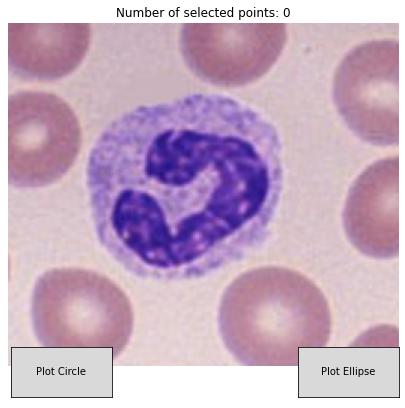

In [7]:
# New plotting functions.
def plot_circle_interactive(ax,a, d, e):
    """
    You can use this function to plot circles with parameters a,d,e.
    The parameters are described in the homework pdf. 
    
    """
    is_circle = d**2 + e**2 - 4*a > 0
    assert is_circle, "Not a circle"
    
    XLIM_LO = 0
    XLIM_HI = 400
    YLIM_LO = 0
    YLIM_HI = 400
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a*(x**2 + y**2) + d*x + e*y
    
    c1 = ax.contour(x, y, f(x,y), [1], colors='r')


def plot_ellipse_interactive(ax,a, b, c, d, e):
    """
    You can use this function to plot ellipses with parameters a-e.
    The parameters are described in the homework pdf. 
    """
    is_ellipse = b**2 - 4*a*c < 0
    assert is_ellipse, "Not an ellipse"
    
    XLIM_LO = 0
    XLIM_HI = 400
    YLIM_LO = 0
    YLIM_HI = 400
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a*x**2 + b*x*y + c*y**2 + d*x + e*y
    
    c1 = ax.contour(x, y, f(x,y), [1], colors='r')
    
# Read the cell image

img = mpimg.imread('figure_hw13.png')
fig, ax = plt.subplots(1,figsize=(7,7))
ax.axis("off")
ax.imshow(img)

# Create and display textarea widget
txt = wdg.Textarea(
    value='',
    placeholder='',
    description='event:',
    disabled=False
)
display(txt)

select_points = []
ax.set_title("Number of selected points: %d"%(0))
def button_click(event):
    
#     ax.set_title("%d"%(len(select_points)))
    xy = np.array(select_points)
    x = xy[:,0]
    y = xy[:,1]

    # First we compute our estimated coefficients
    A = np.array([x**2+y**2,x,y]).T 
    print("A = {}\n".format(A))
    b = np.ones((len(select_points),)) * 1
    xhat = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(b)
    plot_circle_interactive(ax,xhat[0], xhat[1], xhat[2])
    
    
def button_click_e(event):
    
    # PART D
    xy = np.array(select_points)
    x = xy[:,0]
    y = xy[:,1]
    # First we compute our estimated coefficients
    A = np.array([x**2,x*y,y**2,x,y]).T
    b = np.ones((len(select_points),))
    xhat = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(b)
    plot_ellipse_interactive(ax,xhat[0], xhat[1], xhat[2], xhat[3], xhat[4])

def onclick(event):
    if event.xdata > 1 and event.ydata > 1:
        txt.value = "x_index: %s, y_index: %s"%(str(event.xdata),str(event.ydata))
        
        ax.plot(event.xdata, event.ydata, marker='o', color="red",markersize=10)
        select_points.append((event.xdata,event.ydata))
        ax.set_title("Number of selected points: %d"%(len(select_points)))
    
# ka = fig.canvas.mpl_connect('button_press_event', onclick)

## Add a button
# ax[1].axis("off")
button = plt.axes([0.13, 0.1, 0.2, 0.1])
b_circle = Button(button, 'Plot Circle')
b_circle.on_clicked(button_click)


button_e = plt.axes([0.7, 0.1, 0.2, 0.1])
b_e = Button(button_e, 'Plot Ellipse')
b_e.on_clicked(button_click_e)
# plt.show()
ka = fig.canvas.mpl_connect('button_press_event', onclick)

You may find [plt.scatter](http://matplotlib.org/api/pyplot_api.html) useful for plotting the points.
## Part D

In [ ]:
xy = np.array([[0.3, -0.69],
               [0.5, 0.87],
               [0.9, -0.86],
               [1, 0.88],
               [1.2, -0.82],
               [1.5, .64],
               [1.8, 0]])
x = xy[:,0]
y = xy[:,1]

# plot the data points
plt.scatter(x,y)

A = np.array([x**2+y**2,x,y]).T # Hint: this generates the A matrix
b = # YOUR CODE HERE

circle_params = # YOUR CODE HERE
print(circle_params)
plot_circle(circle_params[0],circle_params[1],circle_params[2])

## Part E

In [ ]:
# plot the data points
plt.scatter(x,y)

A = # YOUR CODE HERE
b = # YOUR CODE HERE

ellipse_params = # YOUR CODE HERE
print(ellipse_params)
plot_ellipse(ellipse_params[0],ellipse_params[1],ellipse_params[2],ellipse_params[3],ellipse_params[4])